딥러닝 파이토치 교과서
ch4
 p.138~163

# CH 4. 딥러닝 시작

## 4.1 인공 신경망의 한계와 딥러닝 출현

퍼셉트론
- 오늘날 인공 신경망에서 이용하는 구조 : 입력층, 출력층, 가중치로 구성된 구조
- 오늘날 신경망 (딥러닝)의 기원이 되는 알고리즘
- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- '흐른다/안 흐른다 (1 또는 0)' 정보를 앞으로 전달하는 원리로 작동

 - 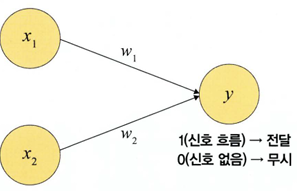

#### [AND 게이트]
- 모든 입력이 ‘1’일 때 작동
- 입력 중 어떤 하나라도 ‘0’을 가지면 자동으로 멈춤

 - 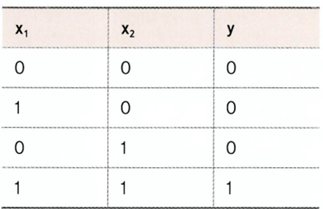

  - 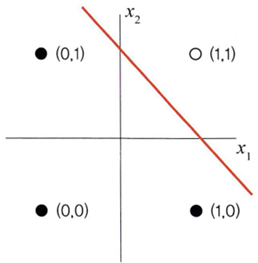

####［OR 게이트｣

- 입력에서 둘 중 하나만 '1'이거나 둘 다 '1'일 때 작동
- 입력 모두가 '0'을 갖는 경우를 제외한 나머지가 모두 '1' 값을 가짐

 - 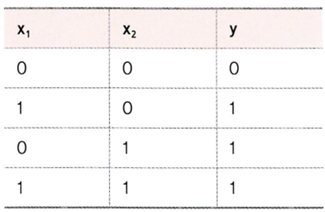

 - 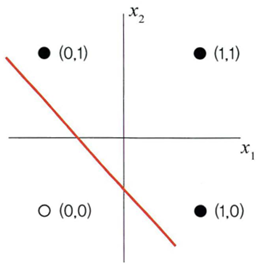

#### [XOR 게이트]
- 배타적 논리합
- 입력 두 개 중 한 개만 '1'일 때 작동하는 논리 연산
 - 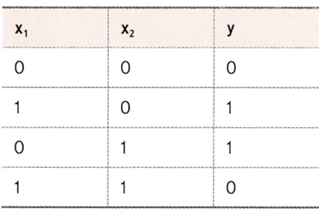

- 데이터가 비선형적으로 분리됨 -> 제대로 된 분류가 어려움
 - 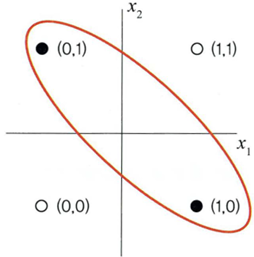

- 해결책
 - 입력층과 출력층 사이에 하나 이상의 중간층（은닉층）을 두기
 - 비선형적으로 분리된 데이터에 대해서도 학습이 가능하도록 '다층 퍼셉트론’ 고안

심층 신경망（딥러닝）
- 입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망

## 4.2 딥러닝 구조

### 4.2.1 딥러닝 용어
입력층, 출력층, 두 개 이상의 은닉층

- 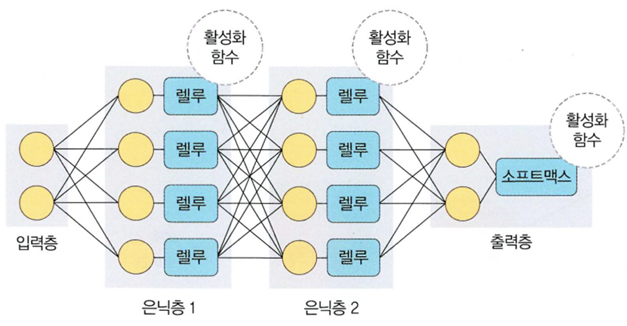



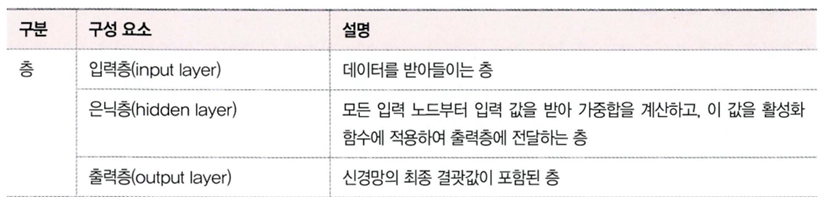

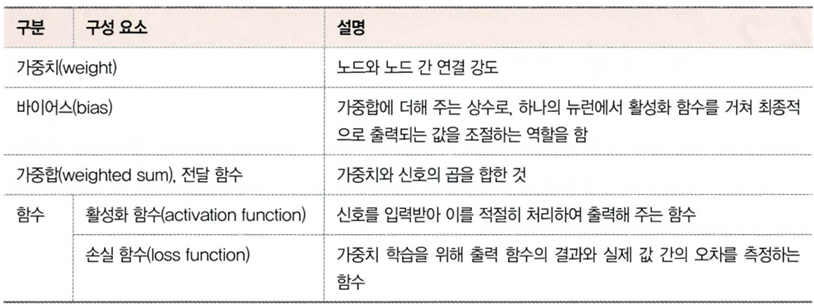

#### [가중치]
가중치 : 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소
- 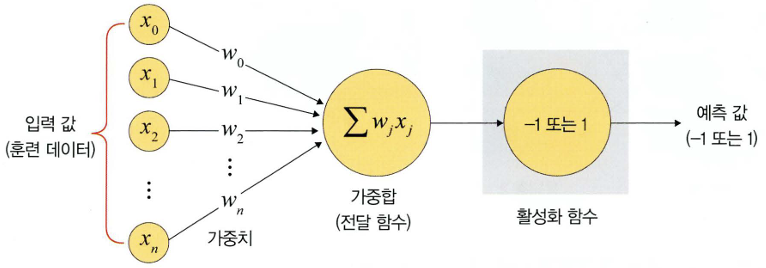

#### [가중합 또는 전달 함수]
가중합 (전달함수) : 각 노드에서 들어오는 신호에서 가중치를 곱해서 다음 노드로 전달될 때, 이 값들을 모둔 더한 합계
- 노드의 가중합이 계산되면 이 가중합을 활성화 함수로 보내기 때문에 전달 함수라고 함
- 전달 함수
 - 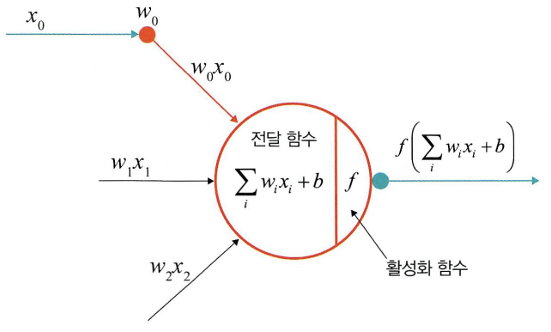
- 가중합
 - 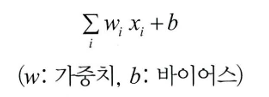

#### [활성화 함수]
활성화 함수 : 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수
- 시그모이드 함수
 - 선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형해 줌
 - 딥러닝 모델의 깊이가 깊어지면 기울기가 사라지는 '기울기 소멸 문제' 발생 -> 잘 사용 x
  - 기울기 소멸 문제 : 활성화 함수 계산 과정에서 도함수 값이 계속 곱해지면서 가중치 결괏값이 0이 되어 더 이상 계산이 불가능한 상태
 - 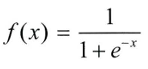
 - 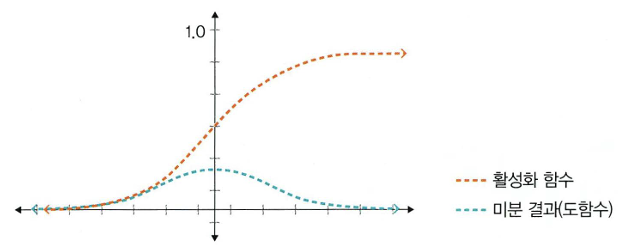

- 하이퍼볼릭 탄젠트 함수
 - 선형 함수 결과를 -1~1 사이에서 비선형 형태로 변형해 줌
 - 시그모이드에서 결괏값의 평균이 0이 아닌 양수로 편향된 문제는 해결됨
 - 기울기 소멸 문제는 여전히 발생함
 - 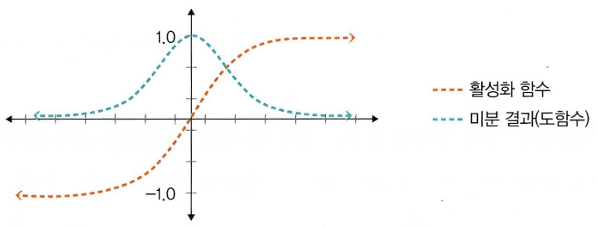

- 렐루 함수
 - 입력(x)이 음수일 때는 0을 출력
 - 입력(x)이 양수일 때는 x를 출력
 - 경사 하강법에 영향을 주지 않아 학습 속도가 빠름
 - 기울기 소멸 문제가 발생하지 않는 장점
 - 렐루 함수는 일반적으로 은닉층에서 사용됨, 하이퍼볼릭 탄젠트 함수 대비 학습 속도가 6배 빠름
 - 음수 값을 입력 받으면 항상 0을 출력하면 학습 능력이 감소 -> 리키 렐루 함수 사용
 - 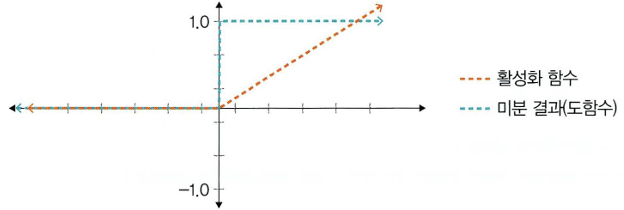

- 리키 렐루 함수
 - 입력 값이 음수이면 0이 아닌 0.001처럼 매우 작은 수를 반환함
 - 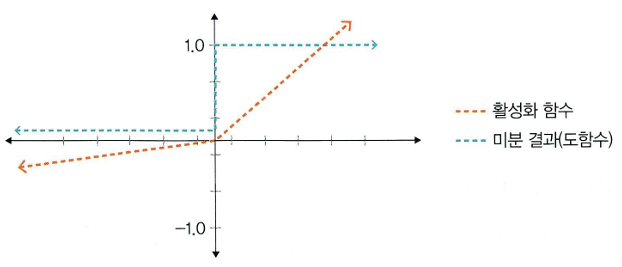

- 소프트맥스 함수
 - 입력 값을 0~1 사이에서 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함
 - 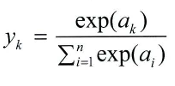

렐루 함수와 소프트맥스 함수 구현 코드

In [1]:
import torch
class Net(torch.nn.Module) :
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
        self.relu = torch.nn.ReLu(inplace = True)
        self.out = torch.nn.Linear(n_hidden, n_output) # 출력층
        self.softmax = torch.nn.Softmax(dim=n_output)
    def forward(self, x):
        x = self.hiddend(x)
        x = self.relu(x) # 은닉층을 위한 렐루 활성화 함수
        x = self.out(x)
        x = self.softmax(x) # 출력층을 위한 소프트맥스 활성화 함수
        return x

#### [손실 함수]
- 경사 하강법 : 학습률과 손실 함수의 순간 기울기를 이용하여 가중치를 업데이트하는 방법
 - 미분의 기울기를 이용하여 오차를 비교하고 최소화하는 방향으로 이동시키는 방법
- 손실 함수 : 오차를 구하는 방법
 - 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표
 - 값이 클수록 많이 틀렸다는 의미
 - '0'에 가까우면 완벽하게 추정할 수 있다는 의미
 - 대표적인 손실 함수 : 평균 제곱 오차 (MSE), 크로스 엔트로피 오차 (CEE)

- 평균 제곱 오차 (MSE)
 - 실제 값과 예측 값의 차이(error)를 제곱하여 평균을 낸 것
 - 값이 작을수록 예측력이 좋다는 것을 의미함
 - 회귀에서 주로 사용
  - 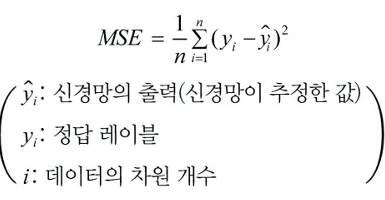



```
import torch
loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
```



- 크로스 에트로피 오차 (CEE)
 - 분류 문제에서 원-핫 인코딩 했을 때 사용할 수 있는 오차 계산법
 - 평균제곱오차 손실 함수와 시그모이드 활성화 함수를 결합하여 사용할 때, 기울기가 매끄럽지 못 하여 학습 속도가 늦어진다는 단점을 해결함
 - 두 개의 확률 분포 차이를 이용하여 시그모이드의 영향을 덜 받음
 - 평균 제곱 오차보다 학습 속도가 빠름
 - 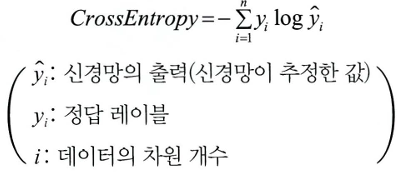



```
loss = nn.CrossEntropyLoss()
input = torch.randn(5,6,requires_grad = True) # torch.randn은 평균이 0이고 표준 편차가 1인 가우시안 정규 분포를 이용하여 숫자를 생성
target = torch.empty(3,dtype=torch.long).randon_(5) # torch.empty는 dtype torch.float32의 랜덤한 값으로 채워진 텐서를 반환
output = loss(input, target)
output.backward()
```



### 4.2.2 딥러닝 학습
- 순전파와 역전파
 - 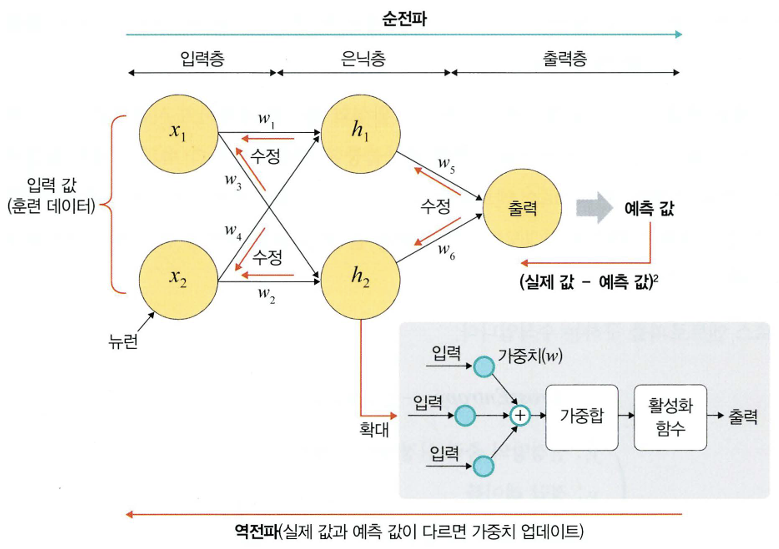


- 순전파 : 네트워크에 훈련 데이터가 들어올 때 발생
 - 데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 지나감
- 이전 층의 뉴런에서 수신한 정보에 변환(가중합, 활성화 함수)을 적용
- -> 다음 층(은닉층)의 뉴런으로 전송
- -> 입력 데이터를 전달
- -> 데이터가 모든 층을 통과하고 모든 뉴런이 계산을 완료
- -> 예측 값은 최종 층(출력층)에 도달
- 손실 함수로 네트워크의 예측 값과 실제 닶의 차이(손실, 오차)를 추정
 - 손실 함수 비용은 '0'이 이상적
- -> 손실 함수 비용이 0에 가깝도록 모델이 훈련을 반복하면서 가중치 조정
- 역전파 : 손실이 계산되면 그 정보는 역으로 전파됨 (출력층 -> 은닉층 -> 입력층)

### 4.2.3 딥러닝의 문제점과 해결 방안
딥러닝 : 활성화 함수가 적용된 여러 은닉층을 결합하여 비선형 영역을 표현하는 것
- 은닉층이 분류에 미치는 영향
 - 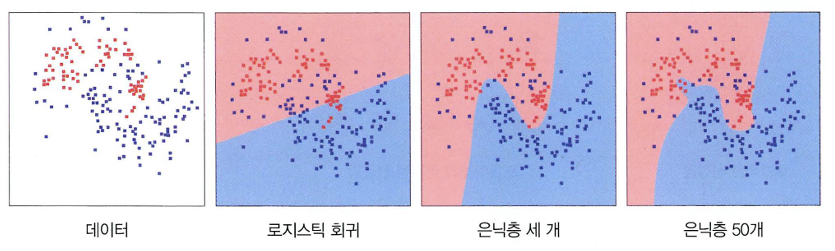

#### [과적합 문제 발생]
과적합 : 훈련 데이터를 과하게 학습해서 발생함
- 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상
 - 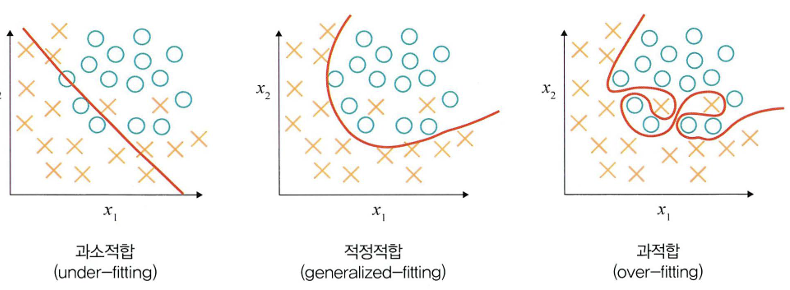

드롭아웃 (dropout) ; 과적합 해결 방법
- 신경망 모델이 과적합되는 것을 피하기 위한 방법
- 학습 과정 중 임의로 일부 노드들을 학습에서 제외시킴
 - 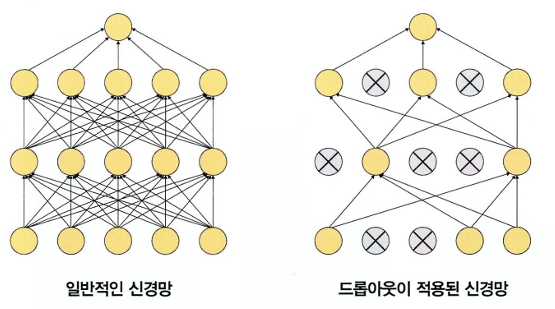


In [3]:
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5) # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200,10)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

#### [기울기 소멸 문제 발생]
기울기 소멸 문제

- 은닉칭이 많은 신경망에서 주로 발생, 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상
- 기울기가 소멸되기 때문에 학습되는 양이 '0'에 가까워져 학습이 더디게 진행되다 오차를 더 줄이지 못하고 그 상태로 수렴하는 현상
- 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수를 사용하면 해결 가능
 - 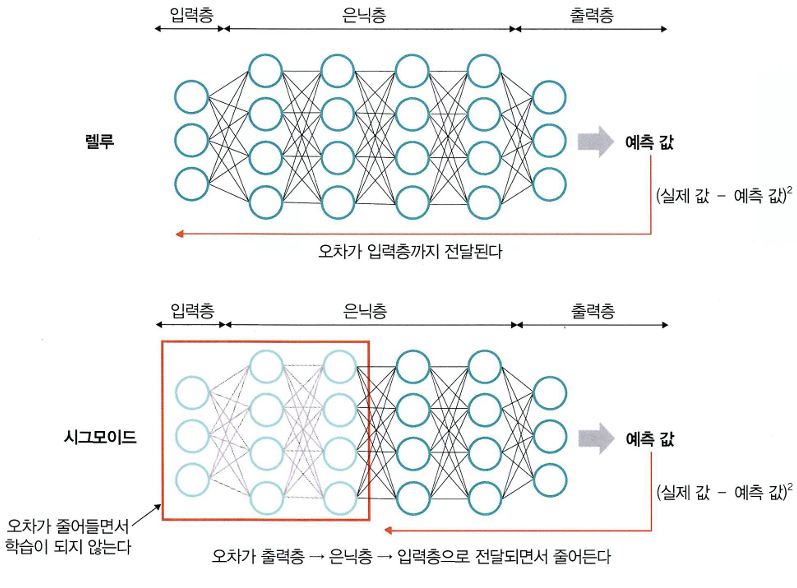

#### [성능이 나빠지는 문제 발생]
경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복 -> 성능이 나빠지는 문제 발생
- 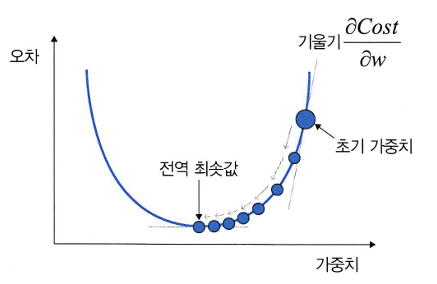

경사 하강법
- 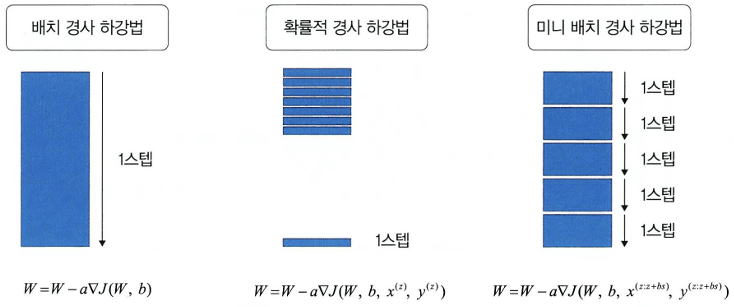


1. 배치 경사 하강법 (Batch Gradient Descent, BGD)
- 전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법
- 전체 훈련 데이터셋에 대해 가중치를 편미분하는 방법
 - 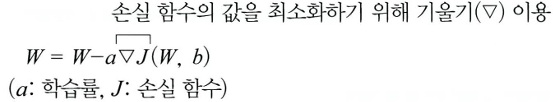
- 모든 훈련 데이터셋을 사용하므로 학습이 오래 걸리는 단점
- 배치 경사 하강법의 학습이 오래 걸리는 단점을 개선한 방법 => 확률적 경사 하강법

2. 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)
- 임의로 선택한 데이터에 대해 기울기를 계산하는 방법
- 적은 데이터를 사용 -> 빠른 계산이 가능
 - 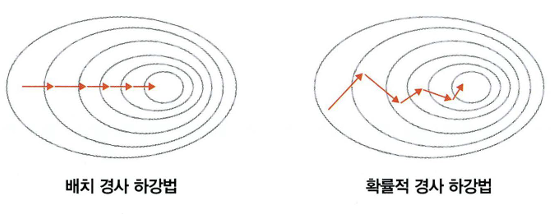

3. 미니 배치 경사 하강법 (Mini-Batch Gradient Descent)
- 전체 데이터셋을 미니 배치 여러 개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해서 학습하는 방법
 - 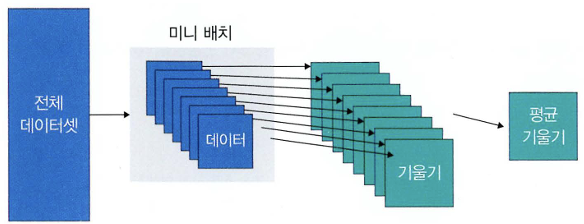
- 전체 데이터를 계산하는 것보다 빠름
- 확률적 경사 하강법보다 안정적이라는 장점 -> 실제로 가장 많이 사용함
 - 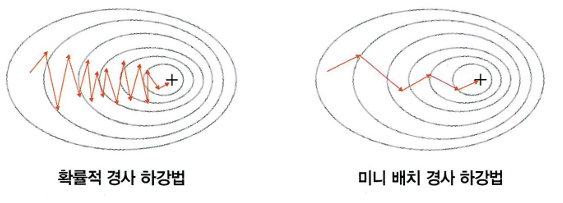



```
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x,y
dataset = CustomDataset()
dataloader = DataLoader(
    dataset, # 데이터셋
    batch_size=2, # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
    shuffle=True, # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴
)
```



--------

[옵티마이저]


확률적 경사 하강법의 파라미터 변경 폭이 불안정한 문제르 해결하기 위해 학습 속도와 운동량을 조정하는 옵티마이저(optimizer)를 적용할 수 있음

- 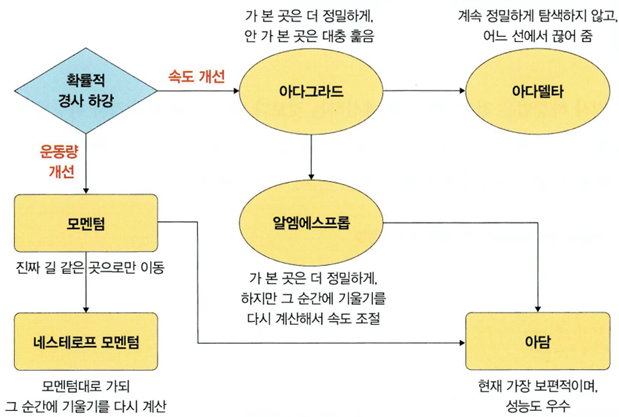


속도를 조정하는 방법


- 아다그라드 (Adagrad, Adaptive gradient)
 - 변수(가중치)의 업데이트 횟수에 따라 학습률을 조정하는 방법
 - 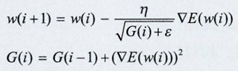



```
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01) # 학습률 기본값은 1e-2
```


- 아다델타 (Adadelta, Adaptive delta)
 - 아다그라드에서 G값이 커짐에 따라 학습이 멈추는 문제를 해결하기 위해 등장한 방법
 - 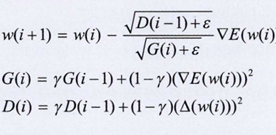


```
optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0) # 학습률 기본값은 1.0
```



- 알엠에스프롭 (RMSProp)
 - 아다그라드의 G(i)값이 무한히 커지는 것을 방지하고자 제안된 방법
 - 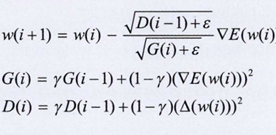


```
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01) # 학습률 기본값은 1e-2
```



운동량을 조정하는 방법
- 모멘텀 (Momentum)
 - 경사하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기 전에 이전 수정 방향 (+,-)을 참고하여 같은 방향으로 일정한 비율만 수정하는 방법
 - SGD(확률적 경사 하강법)와 함께 사용함
 - 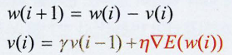
 - momentum 값은 0.9에서 시작하며 0.95, 0.99처럼 조금씩 증가시키면서 사용함


```
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momdentum = 0.9)
```




- 네스테로프 모멘텀 (Nesterov Accerlerated Gradient, NAG)
 - 모멘텀 값과 기울기 값이 더해져 실제 값을 만드는 기존 모멘텀과 달리 모멘텀 값이 적용된 지점에서 기울기 값을 계산함
 - 빠른 이동 속도, 멈추어야 할 적절한 시점에서 제동을 거는 데 훨씬 용이함
 - 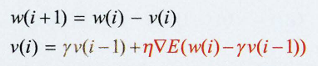


```
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True) # nesterov 기본값은 False
```



- 모멘텀과 네스테로프 모멘텀
 - 속도를 구하는 과정에서 차이가 있음
 - 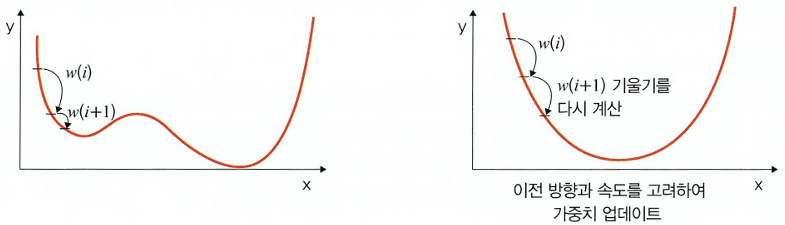

속도와 운동량에 대한 혼용 방법
- 아담 (Adam, Adaptive Moment Estimation)
 - 모멘텀과 알엠에스프롭의 장점을 결합한 경사 하강법
 - 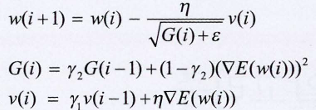


```
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 학습률 기본값은 1e-3
```

-----------

### 4.2.4 딥러닝을 사용할 때 이점

[특성 추출]

특성 추출 : 데이터별로 어떤 특징을 가지고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업

[빅데이터의 효율적 활용]

딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상됨

## 4.3 딥러닝 알고리즘

### 4.3.1 심층 신경망
심층 신경망 (DNN) : 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망
- 다수의 은닉층을 추가 -> 별도의 트릭 없이 비선형 분류가 가능
- 학습을 위한 연산량이 많고 기울기 소멸 문제 등이 발생함
- 문제 해결 : 드롭아웃, 렐루 함수, 배치 정규화 등을 적용
 - 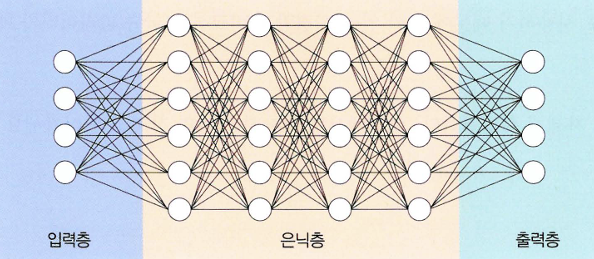

### 4.3.2 합성곱 신경망
합성곱 신경망 (Convolutional Neural Network, CNN)

: 합성곱층(convolutional layer)과 풀링층(pooling layer)을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
- 이미지에서 객체, 얼굴, 장면을 인식하기 위해 패턴을 찾는 데 유용함
 - 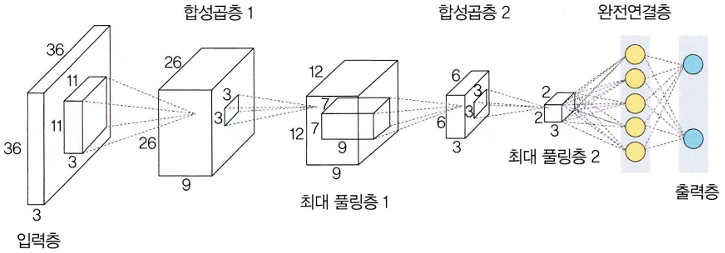


- CNN 특징
 - 각 층의 입출력 형상을 유지
 - 이미지 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식
 - 복수 필터로 이미지의 특징을 추출하고 학습함
 - 추출한 이미지의 특징을 모으고 강화하는 풀링층
 - 필터를 공유 파라미터로 사용 -> 일반 인공 신경망과 비교하여 학습 파라미터가 매우 적음

### 4.3.3 순환 신경망
순환 신경망 (Recurrent Neural Network, RNN)

: 시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망

- 현재 결과가 이전 결과와 연관이 있다는 의미
 - 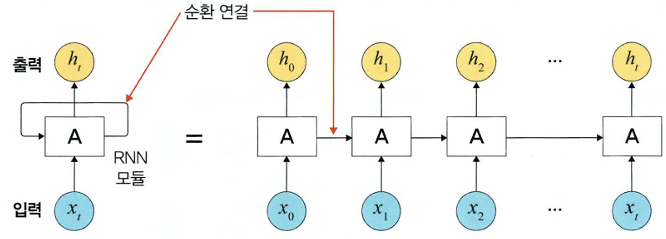

- 순환 신경망의 특징
 - 시간성을 가진 데이터
 - 시간성 정보를 이용하여 데이터의 특징을 잘 다룸
 - 시간에 따라 내용이 변함 -> 데이터가 동적이고 길이가 가변적
 - 매우 긴 데이터를 처리하는 연구가 활발히 진행됨
- 기울기 소멸 문제로 학습이 제대로 되지 않는 문제 => 메모리 개념을 도입한 LSTM을 사용

### 4.3.4 제한된 볼츠만 머신
볼츠만 머신 (Boltzmann machine)

: 가시층 (visible layer)과 은닉층 (hidden layer)으로 구성된 모델

제한된 볼츠만 머신 : 가시층이 은닉층과만 연결되는 것

- 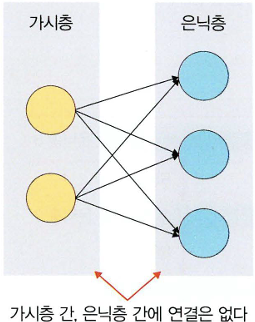

- 제한된 볼츠만 머신의 특징
 - 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용
 - 기울기 소멸 문제 해결 위한 사전 학습 용도로 활용 가능
 - 심층 신뢰 신경망(DBN)의 요소로 활용

### 4.3.5 심층 신뢰 신경망

심층 신뢰 신경망 (Deep Belief Network, DBN) : 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망
- 사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아 올린 구조
- 레이블 없는 데이터에 대한 비지도 학습 가능
- 학습 절차
 - 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련
 - 첫 번째 층 입력 데이터와 파라미터를 고정하여 두 번째 층 제한된 볼츠만 머신을 사전 훈련함
 - 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아 올려 전체 DBN 을 완성
 - 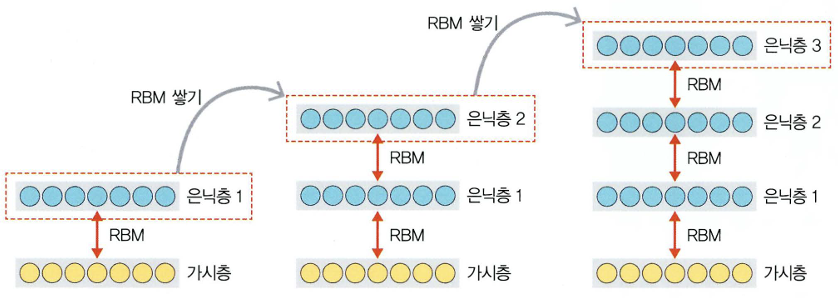

- 심층 신뢰 신경망의 특징
 - 순차적으로 심층 신뢰 신경망을 학습시켜 가면서 계층적 구조를 생성
 - 비지도 학습으로 학습
 - 위로 올라갈수록 추상적 특성을 추출
 - 학습된 가중치를 다층 퍼셉트론의 가중치 초깃값으로 사용